# WINE DATASET 

Dataset - The dataset  has been taken from UCI Machine Learning Repository under the name of Wine Quality Dataset

Attributes - fixed acidity, volatile acidity,citric acid,residual sugars, chlorides,free sulfur dioxide,total sulfur dioxide,density,pH, sulphates, alcohol,quality
We have 2 files , one for red_wine and other for white_wine

Problem Statement -
1. Prediction of wine_type(red/white)
2. Prediction of quality label (low, medium and high)

Problem Type - Classification(Since the response variable(wine_type and quality_label) are categorical)
Approach Used
1. Exploratory data analysis
a) Descriptive Statistics - Five point summary
b) Frequency Distribution plot - Concentration
c) Boxplot - Treatment for Outliers
d) Heatmap - Correlation

2. Data preprocessing
a) Feature importance
b) Scaling
c) Missing values
d) Checking class imabalance
e) Train and test split

3. Modelling 
a) Logistic Refression (wine_type - red and white)
b) Multinomial regression(quality_type - high, medium and low)
c) SVM and K-SVM
d) Naive Bayes
e) Decision Tree
f) Random Forest Classification

4. Optimization (Model improvement) Techniques used-
a) SMOTE - For class imbalance
b) Bagging and Boosting - To oversome Overfitting of train dataset
c) GridSearhCV - for optimality
d) Kernel functions transformation(SVM)



# 1. Importing Libraries

In [1]:
#Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2. Importing dataset

In [8]:
#Loading dataset
white_wine = pd.read_csv('winequality-white.csv',sep=';')
red_wine = pd.read_csv('winequality-red.csv',sep=';')

In [7]:
#Visualizing white_wine dataset in dataframe format
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
#Visualizing red_wine dataset in dataframe format
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
#Rows and Columns of the dataset
print(white_wine.shape)
print(red_wine.shape)

(4898, 12)
(1599, 12)


In [11]:
#Getting attributes of red_wine dataset
for col in red_wine.columns:
  print(col)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [12]:
#Getting attributes of white_wine dataset
for col in white_wine.columns:
  print(col)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


# 3. Data Pre-Processing and Exploratory Data Analysis

In [13]:
#Adding one feature of wine_type
red_wine['wine_type']='red'
white_wine['wine_type']='white'

In [14]:
#Adding one feature of quality label - low, medium and high
red_wine['quality_label']=red_wine['quality'].apply(lambda value:'low'
                                                        if value<=5 else 'medium'
                                                            if value <=7 else 'high')
red_wine['quality_label']=pd.Categorical(red_wine['quality_label'],
                                         categories=['low','medium','high'])
white_wine['quality_label']=white_wine['quality'].apply(lambda value:'low'
                                                        if value<=5 else 'medium'
                                                            if value <=7 else 'high')
white_wine['quality_label']=pd.Categorical(white_wine['quality_label'],
                                         categories=['low','medium','high'])

In [15]:
#Collating both (red_wine and white_wine) in one dataset
wines=pd.concat([red_wine,white_wine])

In [16]:
wines=wines.sample(frac=1,random_state=42).reset_index(drop=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [17]:
print(wines.shape)

(6497, 14)


In [45]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
quality_label           0
dtype: int64

# 4. Descriptive Statistics

In [18]:
#Descriptive Statistice for below selected attributes
# It is done seperately for red wine and white wine to make a comaprison
subset_attributes=['chlorides','density','pH','sulphates','alcohol']
rs=round(red_wine[subset_attributes].describe(),2)
ws=round(white_wine[subset_attributes].describe(),2)
pd.concat([rs,ws],axis=1)

,chlorides,density,pH,sulphates,alcohol,chlorides,density,pH,sulphates,alcohol
count,1599.00,1599.00,1599.00,1599.00,1599.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,0.09,1.00,3.31,0.66,10.42,0.05,0.99,3.19,0.49,10.51
std,0.05,0.00,0.15,0.17,1.07,0.02,0.00,0.15,0.11,1.23
min,0.01,0.99,2.74,0.33,8.40,0.01,0.99,2.72,0.22,8.00
25%,0.07,1.00,3.21,0.55,9.50,0.04,0.99,3.09,0.41,9.50
50%,0.08,1.00,3.31,0.62,10.20,0.04,0.99,3.18,0.47,10.40
75%,0.09,1.00,3.40,0.73,11.10,0.05,1.00,3.28,0.55,11.40
max,0.61,1.00,4.01,2.00,14.90,0.35,1.04,3.82,1.08,14.20


# 5. ANOVA

In [19]:
#ANOVA - Anova test for mean alcohol level across wine samples for different quality ratings
from scipy import stats
F,p = stats.f_oneway(wines[wines['quality_label']=='low']['alcohol'],
                     wines[wines['quality_label']=='medium']['alcohol'],
                     wines[wines['quality_label']=='high']['alcohol'])

In [20]:
print('Anova test for mean alcohol level across wine samples for different quality ratings')
print('F value:',F,'\tp-value:',p)

Anova test for mean alcohol level across wine samples for different quality ratings
F value: 673.0745347231032 	p-value: 2.2715337450621843e-266


In [22]:
#Anova test for mean pH level across wine samples for different quality ratings
F,p = stats.f_oneway(wines[wines['quality_label']=='low']['pH'],
                     wines[wines['quality_label']=='medium']['pH'],
                     wines[wines['quality_label']=='high']['pH'])

In [23]:
print('Anova test for mean pH level across wine samples for different quality ratings')
print('F value:',F,'\tp-value:',p)

Anova test for mean pH level across wine samples for different quality ratings
F value: 1.2363860803545201 	p-value: 0.2905002779768688


# 6. Boxplot

Text(0, 0.5, 'pH')

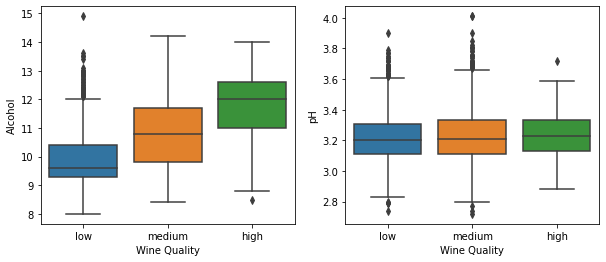

In [25]:
#Boxplot of Wines wrt Alcohol and pH
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
sns.boxplot(x='quality_label',y='alcohol',data=wines,ax=ax1)
ax1.set_xlabel("Wine Quality")
ax1.set_ylabel("Alcohol")
sns.boxplot(x='quality_label',y='pH',data=wines,ax=ax2)
ax2.set_xlabel("Wine Quality")
ax2.set_ylabel("pH")

# 7. Frequency Distribution Plot

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

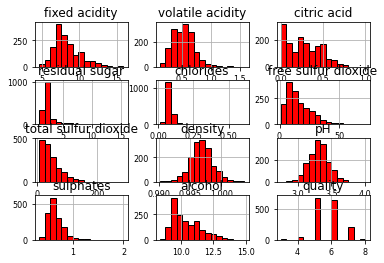

In [26]:
#Distribution plot of red_wine attributes
red_wine.hist(bins=15,color='red',edgecolor='black',xlabelsize=8,ylabelsize=8)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

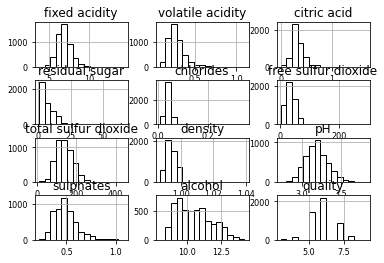

In [27]:
#Distribution plot of white_wine alcohol
white_wine.hist(bins=15,color='white',edgecolor='black',xlabelsize=8,ylabelsize=8)

<AxesSubplot:>

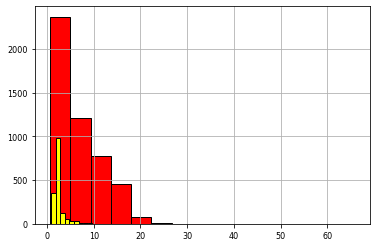

In [28]:
white_wine['residual sugar'].hist(bins=15,color='red',edgecolor='black',xlabelsize=8,ylabelsize=8)
red_wine['residual sugar'].hist(bins=15,color='yellow',edgecolor='black',xlabelsize=8,ylabelsize=8)

<AxesSubplot:>

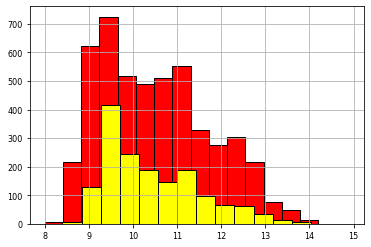

In [29]:
white_wine['alcohol'].hist(bins=15,color='red',edgecolor='black',xlabelsize=8,ylabelsize=8)
red_wine['alcohol'].hist(bins=15,color='yellow',edgecolor='black',xlabelsize=8,ylabelsize=8)

<AxesSubplot:>

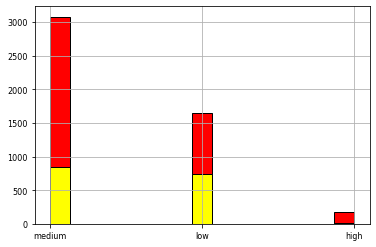

In [30]:
white_wine['quality_label'].hist(bins=15,color='red',edgecolor='black',xlabelsize=8,ylabelsize=8)
red_wine['quality_label'].hist(bins=15,color='yellow',edgecolor='black',xlabelsize=8,ylabelsize=8)

# 8. Heatmap

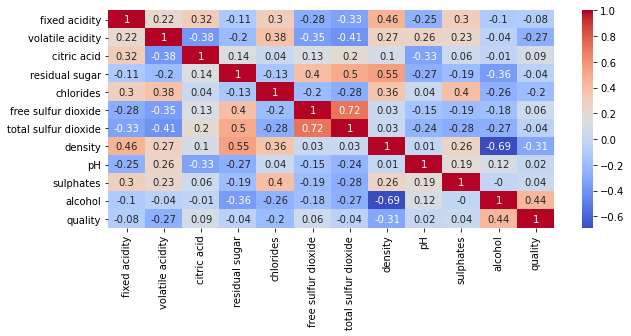

In [31]:
#Heatmap showing correlation between different attributes
f,ax=plt.subplots(figsize=(10,4))
corr=wines.corr()
hm = sns.heatmap(round(corr,2),ax=ax,annot = True,cmap='coolwarm')

# 9. Checking Class Imbalance - wine_type and wine_quality

<AxesSubplot:xlabel='wine_type', ylabel='count'>

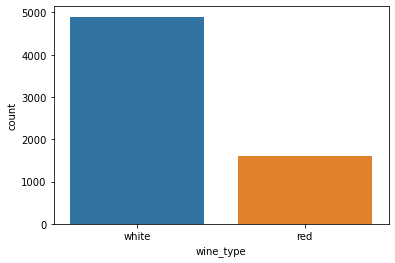

In [37]:
sns.countplot('wine_type', data = wines)

F:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality_label', ylabel='count'>

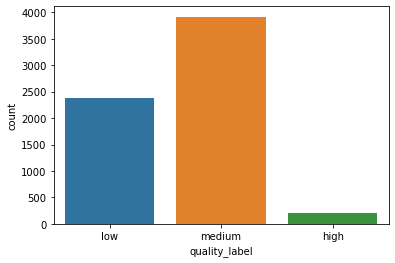

In [38]:
sns.countplot('quality_label', data = wines)

# 10. Setting independent(x) and response variables(y)

In [32]:
x=wines.iloc[:,:-2]
y=wines.iloc[:,12]

# 11. Train-test split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#Splitting the dataset in 70-30 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [35]:
#Understanding the ratio of wine_type in train and test dataset
import collections
from collections import Counter
print(Counter(y_train),Counter(y_test))

Counter({'white': 3434, 'red': 1113}) Counter({'white': 1464, 'red': 486})


# 12. Scaling using z-score

In [39]:
from sklearn.preprocessing import StandardScaler
x_ss = StandardScaler().fit(x_train)
x_sy = x_ss.transform(x_train)

In [42]:
wines.to_csv ('wines.csv', index = False, header=True)